1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Test görüntüsü "[1]"
Test görüntüsü "meningioma_tumor" sınıfına ait.


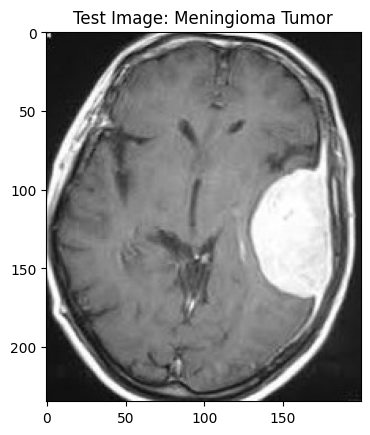

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Modeli yükleme
model = load_model('/content/drive/MyDrive/ypz/beyin/braintumor.h5')

# Test verisi yükleme ve ön işleme
image_size = 200
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = np.expand_dims(img, axis=0)  # Batch boyutu ekle
    return img

# Test etme
test_image_path = '/content/drive/MyDrive/ypz/beyin/target_folder/Testing/meningioma_tumor/image(85).jpg'
test_img = preprocess_image(test_image_path)

# Tahmin yapma
predictions = model.predict(test_img)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = labels[predicted_class_index[0]]
print(f'Test görüntüsü "{predicted_class_index}"')
print(f'Test görüntüsü "{predicted_class}" sınıfına ait.')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Test Image: Meningioma Tumor")
plt.show()


